<a href="https://colab.research.google.com/github/KaylumCassidy/Projects_CV/blob/main/C20323831_CA2_SF_KAYLUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use a Big Data Framework PySpark Video game dateset

## 1. Installing PySpark in Google Colab

In [1]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,048 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [783 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,624 kB]
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.

## 2. Reading Data

In [2]:
import requests
path = "https://raw.githubusercontent.com/KaylumCassidy/CA/main/vgsales.csv"
req = requests.get(path)
url_content = req.content

csv_file_name = 'video_game_sale.csv'
csv_file = open(csv_file_name, 'wb')

csv_file.write(url_content)
csv_file.close()

df = spark.read.csv('/content/'+csv_file_name, header=True, inferSchema=True)

## 3. PySpark DataFrames

In [3]:
#Viewing the dataframe schema
df.printSchema()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)



In [4]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType



# Convert "Year" column from string to integer
df = df.withColumn("Year", col("Year").cast(IntegerType()))
df = df.withColumn("NA_Sales", col("NA_Sales").cast(IntegerType()))
df = df.withColumn("EU_Sales", col("EU_Sales").cast(IntegerType()))
df = df.withColumn("JP_Sales", col("JP_Sales").cast(IntegerType()))
df = df.withColumn("Other_Sales", col("Other_Sales").cast(IntegerType()))
df = df.withColumn("Global_Sales", col("Global_Sales").cast(IntegerType()))

In [5]:
#Summary stats
df.describe().show()

+-------+-----------------+--------------------+--------+------------------+--------+---------------+-------------------+-------------------+--------------------+--------------------+------------------+
|summary|             Rank|                Name|Platform|              Year|   Genre|      Publisher|           NA_Sales|           EU_Sales|            JP_Sales|         Other_Sales|      Global_Sales|
+-------+-----------------+--------------------+--------+------------------+--------+---------------+-------------------+-------------------+--------------------+--------------------+------------------+
|  count|            16598|               16598|   16598|             16327|   16598|          16598|              16598|              16598|               16598|               16598|             16598|
|   mean|8300.605253645017|              1942.0|  2600.0|2006.4064433147546|    NULL|           NULL|0.10621761658031088|0.05042776238100976|0.024460778407036993|0.007350283166646584|0.294

In [6]:
# Filter rows where Platform is "PS2" and order by "Year" descending
df_filtered = df.filter(df.Platform == "PS2").orderBy(col("Year").desc())

# Show the results
df_filtered.show()

+-----+--------------------+--------+----+---------+--------------------+--------+--------+--------+-----------+------------+
| Rank|                Name|Platform|Year|    Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+-----+--------------------+--------+----+---------+--------------------+--------+--------+--------+-----------+------------+
| 9396|    MLB 11: The Show|     PS2|2011|   Sports|Sony Computer Ent...|       0|       0|       0|          0|           0|
|10141|       WWE All Stars|     PS2|2011| Fighting|                 THQ|       0|       0|       0|          0|           0|
|11226|             FIFA 12|     PS2|2011|   Sports|     Electronic Arts|       0|       0|       0|          0|           0|
|12491|Pro Evolution Soc...|     PS2|2011|   Action|Konami Digital En...|       0|       0|       0|          0|           0|
|13201|Major League Base...|     PS2|2011|   Sports|Take-Two Interactive|       0|       0|       0|          0|      

In [7]:
#Simple Group by Function
df.groupBy("Platform").sum("NA_Sales").orderBy(F.desc("sum(NA_Sales)")).show(truncate=False)

+--------+-------------+
|Platform|sum(NA_Sales)|
+--------+-------------+
|X360    |288          |
|Wii     |237          |
|PS2     |225          |
|PS3     |135          |
|PS      |132          |
|DS      |113          |
|NES     |94           |
|GB      |89           |
|N64     |61           |
|GBA     |49           |
|PC      |44           |
|SNES    |43           |
|PS4     |40           |
|2600    |39           |
|XOne    |35           |
|3DS     |32           |
|XB      |32           |
|GC      |30           |
|GEN     |14           |
|WiiU    |14           |
+--------+-------------+
only showing top 20 rows



In [8]:

from pyspark.sql.functions import sum as _sum, col


# Aggregate global sales by genre
genre_sales = df.groupBy("Genre").agg(_sum("Global_Sales").alias("Total_Global_Sales"))

# Sort the genres by total sales in descending order
sorted_genre_sales = genre_sales.orderBy(col("Total_Global_Sales").desc())

# Collect the results to simulate a bar chart output
sorted_genre_sales_list = sorted_genre_sales.collect()

# Shutdown the Spark session
spark.stop()

sorted_genre_sales_list


[Row(Genre='Action', Total_Global_Sales=905),
 Row(Genre='Sports', Total_Global_Sales=671),
 Row(Genre='Shooter', Total_Global_Sales=665),
 Row(Genre='Platform', Total_Global_Sales=575),
 Row(Genre='Role-Playing', Total_Global_Sales=555),
 Row(Genre='Racing', Total_Global_Sales=416),
 Row(Genre='Misc', Total_Global_Sales=411),
 Row(Genre='Fighting', Total_Global_Sales=225),
 Row(Genre='Simulation', Total_Global_Sales=190),
 Row(Genre='Puzzle', Total_Global_Sales=136),
 Row(Genre='Adventure', Total_Global_Sales=76),
 Row(Genre='Strategy', Total_Global_Sales=55)]

## 4. Spark SQL

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType

# Initialize Spark session
spark = SparkSession.builder.appName("Data Processing Example").getOrCreate()

# Load CSV directly from URL or local path
df = spark.read.csv('video_game_sale.csv', header=True, inferSchema=True)

# Cast columns to desired types
df = df.withColumn("Year", col("Year").cast(IntegerType()))
# Repeat for other columns as needed

# Create a temporary view to use SQL
df.createOrReplaceTempView("sales_data")





In [21]:
#Creating a table from the dataframe
df.createOrReplaceTempView("Year") #temporary view
# df.saveAsTable("Year") #Save as a table
# df.write.mode("overwrite").saveAsTable("Year") #Save as table and overwrite table if exits

In [22]:

df2 = spark.sql("SELECT * from Year")
df2.printSchema()
df2.show()

root
 |-- Rank: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Platform: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Publisher: string (nullable = true)
 |-- NA_Sales: double (nullable = true)
 |-- EU_Sales: double (nullable = true)
 |-- JP_Sales: double (nullable = true)
 |-- Other_Sales: double (nullable = true)
 |-- Global_Sales: double (nullable = true)

+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|Rank|                Name|Platform|Year|       Genre|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|
+----+--------------------+--------+----+------------+--------------------+--------+--------+--------+-----------+------------+
|   1|          Wii Sports|     Wii|2006|      Sports|            Nintendo|   41.49|   29.02|    3.77|       8.46|       82.74|
|   2|   Super Mario Bros.|     NES|1985|    Pl

In [23]:
groupDF = spark.sql("SELECT Platform, count(*) from Year group by Platform")
groupDF.show()

+--------+--------+
|Platform|count(1)|
+--------+--------+
|     3DO|       3|
|      PC|     960|
|     PS3|    1329|
|     NES|      98|
|      PS|    1196|
|      DC|      52|
|     GEN|      27|
|     PS2|    2161|
|     3DS|     509|
|    PCFX|       1|
|      GG|       1|
|    WiiU|     143|
|    SNES|     239|
|      GB|      98|
|     SCD|       6|
|     N64|     319|
|     PS4|     336|
|     PSP|    1213|
|    2600|     133|
|    XOne|     213|
+--------+--------+
only showing top 20 rows



## 5. Analysis

### 1. Genre Analysis

In [ ]:
from pyspark.sql.functions import col

genre_counts = df.groupBy("Genre").count().orderBy(col("count").desc())
genre_counts.show()


+------------+-----+
|       Genre|count|
+------------+-----+
|      Action| 3316|
|      Sports| 2346|
|        Misc| 1739|
|Role-Playing| 1488|
|     Shooter| 1310|
|   Adventure| 1286|
|      Racing| 1249|
|    Platform|  886|
|  Simulation|  867|
|    Fighting|  848|
|    Strategy|  681|
|      Puzzle|  582|
+------------+-----+



To find out which game genres have been made the most, you can count the number of occurrences of each genre.

### 2. Release Year Analysis

In [ ]:
release_counts = df.groupBy("Year").count().orderBy(col("count").desc())
release_counts.show()


+----+-----+
|Year|count|
+----+-----+
|2009| 1431|
|2008| 1428|
|2010| 1259|
|2007| 1202|
|2011| 1139|
|2006| 1008|
|2005|  941|
|2002|  829|
|2003|  775|
|2004|  763|
|2012|  657|
|2015|  614|
|2014|  582|
|2013|  546|
|2001|  482|
|1998|  379|
|2000|  349|
|2016|  344|
|1999|  338|
|1997|  289|
+----+-----+
only showing top 20 rows



### 3. Yearly Genre Release Analysis

In [ ]:
year_genre_counts = df.groupBy("Year", "Genre").count().orderBy(col("count").desc())
year_genre_counts.show()


+----+---------+-----+
|Year|    Genre|count|
+----+---------+-----+
|2009|   Action|  272|
|2012|   Action|  266|
|2015|   Action|  255|
|2011|   Action|  239|
|2010|   Action|  226|
|2008|   Action|  221|
|2008|     Misc|  212|
|2007|   Action|  211|
|2009|     Misc|  207|
|2010|     Misc|  201|
|2008|   Sports|  200|
|2005|   Action|  192|
|2002|   Sports|  188|
|2010|   Sports|  186|
|2014|   Action|  186|
|2006|   Action|  184|
|2011|     Misc|  184|
|2009|   Sports|  184|
|2007|   Sports|  167|
|2008|Adventure|  166|
+----+---------+-----+
only showing top 20 rows



### 4. Regional Revenue Analysis

In [ ]:
from pyspark.sql.functions import sum as _sum


# Aggregate sales data by region
region_sales = df.select(
    _sum("NA_Sales").alias("NA_Sales"),
    _sum("EU_Sales").alias("EU_Sales"),
    _sum("JP_Sales").alias("JP_Sales"),
    _sum("Other_Sales").alias("Other_Sales")
)

# Display the aggregated sales data
region_sales.show()



+--------+--------+--------+-----------+
|NA_Sales|EU_Sales|JP_Sales|Other_Sales|
+--------+--------+--------+-----------+
|    1763|     837|     406|        122|
+--------+--------+--------+-----------+



### 5. Distribution of Quantitative Variables

In [ ]:
# Show basic statistics for the 'Global_Sales' column
df.select("Global_Sales").summary().show()

# For more detailed analysis, use the agg() method
from pyspark.sql.functions import mean, stddev, max, min

df.agg(mean("Global_Sales").alias("Mean"),
                        stddev("Global_Sales").alias("StdDev"),
                        max("Global_Sales").alias("Max"),
                        min("Global_Sales").alias("Min")).show()


+-------+------------------+
|summary|      Global_Sales|
+-------+------------------+
|  count|             16598|
|   mean|0.2940113266658634|
| stddev| 1.502527940050593|
|    min|                 0|
|    25%|                 0|
|    50%|                 0|
|    75%|                 0|
|    max|                82|
+-------+------------------+

+------------------+-----------------+---+---+
|              Mean|           StdDev|Max|Min|
+------------------+-----------------+---+---+
|0.2940113266658634|1.502527940050593| 82|  0|
+------------------+-----------------+---+---+



### 6. Frequent in the database

The 5 most frequent games in the database

In [ ]:
from pyspark.sql.functions import desc

# Group by the game name, count the occurrences, and order by count descending
most_frequent_games = df.groupBy("Name").count().orderBy(desc("count"))

# Show the top 5 most frequent games
most_frequent_games.show(5)


+--------------------+-----+
|                Name|count|
+--------------------+-----+
|Need for Speed: M...|   12|
|LEGO Marvel Super...|    9|
|       Madden NFL 07|    9|
|         Ratatouille|    9|
|             FIFA 14|    9|
+--------------------+-----+
only showing top 5 rows



The 5 most frequent gaming platforms in the database¶

In [ ]:
from pyspark.sql.functions import desc

# Group by the game name, count the occurrences, and order by count descending
most_frequent_games = df.groupBy("Platform").count().orderBy(desc("count"))

# Show the top 5 most frequent games
most_frequent_games.show(5)


+--------+-----+
|Platform|count|
+--------+-----+
|      DS| 2163|
|     PS2| 2161|
|     PS3| 1329|
|     Wii| 1325|
|    X360| 1265|
+--------+-----+
only showing top 5 rows



Most Frequent Genre


In [ ]:
from pyspark.sql.functions import count, lit, format_number

# Group by 'Genre' and count the occurrences
genre_counts = df.groupBy("Genre").count().withColumnRenamed("count", "Frequency")

# Calculate the total number of games
total_games = df.count()

# Calculate the percentage of each genre
genre_percentages = genre_counts.withColumn("Percent", (col("Frequency") / lit(total_games) * 100))

# Format the percentage column for readability
genre_percentages = genre_percentages.withColumn("Percent", format_number("Percent", 2))

# Order by frequency descending to show the most common genres first
genre_percentages_ordered = genre_percentages.orderBy(desc("Frequency"))

# Show the result
genre_percentages_ordered.show()


+------------+---------+-------+
|       Genre|Frequency|Percent|
+------------+---------+-------+
|      Action|     3316|  19.98|
|      Sports|     2346|  14.13|
|        Misc|     1739|  10.48|
|Role-Playing|     1488|   8.96|
|     Shooter|     1310|   7.89|
|   Adventure|     1286|   7.75|
|      Racing|     1249|   7.53|
|    Platform|      886|   5.34|
|  Simulation|      867|   5.22|
|    Fighting|      848|   5.11|
|    Strategy|      681|   4.10|
|      Puzzle|      582|   3.51|
+------------+---------+-------+



The 10 most frequent Publisher in the database

In [ ]:
from pyspark.sql.functions import count, lit, format_number

# Group by 'Publisher' and count the occurrences
Publisher_counts = df.groupBy("Publisher").count().withColumnRenamed("count", "Frequency")

# Calculate the total number of games
total_games = df.count()

# Calculate the percentage of each Publisher
Publisherpercentages = Publisher_counts.withColumn("Percent", (col("Frequency") / lit(total_games) * 100))

# Format the percentage column for readability
Publisherpercentages = Publisherpercentages.withColumn("Percent", format_number("Percent", 2))

# Order by frequency descending to show the most common Publisher first
Publisherpercentages_ordered = Publisherpercentages.orderBy(desc("Frequency"))

# Show the result
Publisherpercentages_ordered.show()

+--------------------+---------+-------+
|           Publisher|Frequency|Percent|
+--------------------+---------+-------+
|     Electronic Arts|     1351|   8.14|
|          Activision|      975|   5.87|
|  Namco Bandai Games|      932|   5.62|
|             Ubisoft|      921|   5.55|
|Konami Digital En...|      832|   5.01|
|                 THQ|      715|   4.31|
|            Nintendo|      703|   4.24|
|Sony Computer Ent...|      683|   4.11|
|                Sega|      639|   3.85|
|Take-Two Interactive|      413|   2.49|
|              Capcom|      381|   2.30|
|               Atari|      363|   2.19|
|          Tecmo Koei|      338|   2.04|
|         Square Enix|      233|   1.40|
|Warner Bros. Inte...|      232|   1.40|
|Disney Interactiv...|      218|   1.31|
|             Unknown|      203|   1.22|
|   Eidos Interactive|      198|   1.19|
|        Midway Games|      198|   1.19|
|           505 Games|      192|   1.16|
+--------------------+---------+-------+
only showing top

### 8. Anomaly Detection

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import avg

# Calculate the average sales for each genre
avg_sales_by_genre = df.groupBy("Genre").agg(avg("Global_Sales").alias("Avg_Global_Sales"))

# Join back to the original dataframe
df = df.join(avg_sales_by_genre, "Genre")


In [ ]:
# Define high and low sales thresholds (e.g., more than double or less than half the average sales for its genre)
df = df.withColumn("Sales_Anomaly", when((col("Global_Sales") > 2 * col("Avg_Global_Sales")) | (col("Global_Sales") < 0.5 * col("Avg_Global_Sales")), 1).otherwise(0))

# Filter to see anomalies
df.filter("Sales_Anomaly = 1").show()


+------------+----+--------------------+--------+----+--------------------+--------+--------+--------+-----------+------------+-----+-------------------+-------------+
|       Genre|Rank|                Name|Platform|Year|           Publisher|NA_Sales|EU_Sales|JP_Sales|Other_Sales|Global_Sales|label|   Avg_Global_Sales|Sales_Anomaly|
+------------+----+--------------------+--------+----+--------------------+--------+--------+--------+-----------+------------+-----+-------------------+-------------+
|      Sports|   1|          Wii Sports|     Wii|2006|            Nintendo|      41|      29|       3|          8|          82|    1|0.28601875532821824|            1|
|    Platform|   2|   Super Mario Bros.|     NES|1985|            Nintendo|      29|       3|       6|          0|          40|    1| 0.6489841986455982|            1|
|      Racing|   3|      Mario Kart Wii|     Wii|2008|            Nintendo|      15|      12|       3|          3|          35|    1|0.33306645316253003|       

### 7. Relations of columns heatmap

In [ ]:
from pyspark.sql.functions import corr

# Compute and show the correlation between NA_Sales and EU_Sales
na_eu_corr = df.select(corr("NA_Sales", "EU_Sales").alias("NA_EU_Correlation"))
na_eu_corr.show()

# Compute and show the correlation between NA_Sales and Global_Sales
na_global_corr = df.select(corr("NA_Sales", "Global_Sales").alias("NA_Global_Correlation"))
na_global_corr.show()

pandas_df = df.select("NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales").toPandas()
corr_matrix = pandas_df.corr()
print(corr_matrix)


+------------------+
| NA_EU_Correlation|
+------------------+
|0.7282287675047117|
+------------------+

+---------------------+
|NA_Global_Correlation|
+---------------------+
|   0.9221426317351326|
+---------------------+

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.728229  0.458591     0.481687      0.922143
EU_Sales      0.728229  1.000000  0.434468     0.578514      0.865857
JP_Sales      0.458591  0.434468  1.000000     0.188363      0.594700
Other_Sales   0.481687  0.578514  0.188363     1.000000      0.572492
Global_Sales  0.922143  0.865857  0.594700     0.572492      1.000000


## 6. SALES

### 1. Best selling

Analysis of the world's best-selling games

In [ ]:
from pyspark.sql.functions import desc

# Aggregate and sort NA_Sales
best_selling_na = df.groupBy("Name").agg(sum("NA_Sales").alias("Total_NA_Sales")).orderBy(desc("Total_NA_Sales"))

# Aggregate and sort EU_Sales
best_selling_eu = df.groupBy("Name").agg(sum("EU_Sales").alias("Total_EU_Sales")).orderBy(desc("Total_EU_Sales"))

# Aggregate and sort JP_Sales
best_selling_jp = df.groupBy("Name").agg(sum("JP_Sales").alias("Total_JP_Sales")).orderBy(desc("Total_JP_Sales"))

# Aggregate and sort Other_Sales
best_selling_other = df.groupBy("Name").agg(sum("Other_Sales").alias("Total_Other_Sales")).orderBy(desc("Total_Other_Sales"))

# Aggregate and sort Global_Sales
best_selling_global = df.groupBy("Name").agg(sum("Global_Sales").alias("Total_Global_Sales")).orderBy(desc("Total_Global_Sales"))

# Show the top games for each region and globally
print("Best Selling Games in North America:")
best_selling_na.show(5)
print("Best Selling Games in Europe:")
best_selling_eu.show(5)
print("Best Selling Games in Japan:")
best_selling_jp.show(5)
print("Best Selling Games in Other Regions:")
best_selling_other.show(5)
print("Best Selling Games Globally:")
best_selling_global.show(5)


Best Selling Games in North America:
+------------------+--------------+
|              Name|Total_NA_Sales|
+------------------+--------------+
|        Wii Sports|            41|
| Super Mario Bros.|            32|
|         Duck Hunt|            26|
|            Tetris|            25|
|Grand Theft Auto V|            21|
+------------------+--------------+
only showing top 5 rows

Best Selling Games in Europe:
+------------------+--------------+
|              Name|Total_EU_Sales|
+------------------+--------------+
|        Wii Sports|            29|
|Grand Theft Auto V|            21|
|    Mario Kart Wii|            12|
|        Nintendogs|            11|
| Wii Sports Resort|            11|
+------------------+--------------+
only showing top 5 rows

Best Selling Games in Japan:
+--------------------+--------------+
|                Name|Total_JP_Sales|
+--------------------+--------------+
|Pokemon Red/Pokem...|            10|
|Pokemon Gold/Poke...|             7|
|Pokemon Diamond

best-selling games globally from 1980 to 2016

In [ ]:
from pyspark.sql.functions import sum as _sum, col, desc

# Filter the DataFrame for the years 1980 to 2016
filtered_df = df.filter((col("Year") >= 1980) & (col("Year") <= 2016))

# Aggregate global sales by game name and sort in descending order
best_selling_games_global = filtered_df.groupBy("Name").agg(_sum("Global_Sales").alias("Total_Global_Sales")).orderBy(desc("Total_Global_Sales"))

# Show the top best-selling games globally from 1980 to 2016
best_selling_games_global.show(10)


+--------------------+------------------+
|                Name|Total_Global_Sales|
+--------------------+------------------+
|          Wii Sports|                82|
|  Grand Theft Auto V|                54|
|   Super Mario Bros.|                45|
|      Mario Kart Wii|                35|
|              Tetris|                35|
|   Wii Sports Resort|                33|
|Pokemon Red/Pokem...|                31|
|New Super Mario B...|                30|
|            Wii Play|                29|
|           Duck Hunt|                28|
+--------------------+------------------+
only showing top 10 rows



In [ ]:
from pyspark.sql.functions import sum as _sum, col, desc

# Filter the DataFrame for the 2016
filtered_df = df.filter((col("Year") >= 2016) & (col("Year") <= 2016))

# Aggregate global sales by game name and sort in descending order
best_selling_games_global = filtered_df.groupBy("Name").agg(_sum("Global_Sales").alias("Total_Global_Sales")).orderBy(desc("Total_Global_Sales"))

# Show the top best-selling games globally from
best_selling_games_global.show(10)

+--------------------+------------------+
|                Name|Total_Global_Sales|
+--------------------+------------------+
|Tom Clancy's The ...|                 5|
|             FIFA 17|                 5|
|Uncharted 4: A Th...|                 4|
|     Far Cry: Primal|                 2|
|Ratchet & Clank (...|                 1|
|         Doom (2016)|                 1|
|       Madden NFL 17|                 1|
|            NBA 2K17|                 1|
|Naruto Shippuden:...|                 1|
|           Overwatch|                 1|
+--------------------+------------------+
only showing top 10 rows



### 2. Number of Sales per platform

In [ ]:
from pyspark.sql.functions import sum as _sum, col, desc

# Aggregate and sort NA_Sales per platform
total_sales_na = df.groupBy("Platform").agg(_sum("NA_Sales").alias("Total_NA_Sales")).orderBy(desc("Total_NA_Sales"))

# Aggregate and sort EU_Sales per platform
total_sales_eu = df.groupBy("Platform").agg(_sum("EU_Sales").alias("Total_EU_Sales")).orderBy(desc("Total_EU_Sales"))

# Aggregate and sort JP_Sales per platform
total_sales_jp = df.groupBy("Platform").agg(_sum("JP_Sales").alias("Total_JP_Sales")).orderBy(desc("Total_JP_Sales"))

# Aggregate and sort Other_Sales per platform
total_sales_other = df.groupBy("Platform").agg(_sum("Other_Sales").alias("Total_Other_Sales")).orderBy(desc("Total_Other_Sales"))

# Aggregate and sort Global_Sales per platform
total_sales_global = df.groupBy("Platform").agg(_sum("Global_Sales").alias("Total_Global_Sales")).orderBy(desc("Total_Global_Sales"))

# Display the results
print("Total NA Sales per Platform:")
total_sales_na.show()
print("Total EU Sales per Platform:")
total_sales_eu.show()
print("Total JP Sales per Platform:")
total_sales_jp.show()
print("Total Other Sales per Platform:")
total_sales_other.show()
print("Total Global Sales per Platform:")
total_sales_global.show()


Total NA Sales per Platform:
+--------+--------------+
|Platform|Total_NA_Sales|
+--------+--------------+
|    X360|           288|
|     Wii|           237|
|     PS2|           225|
|     PS3|           135|
|      PS|           132|
|      DS|           113|
|     NES|            94|
|      GB|            89|
|     N64|            61|
|     GBA|            49|
|      PC|            44|
|    SNES|            43|
|     PS4|            40|
|    2600|            39|
|    XOne|            35|
|     3DS|            32|
|      XB|            32|
|      GC|            30|
|     GEN|            14|
|    WiiU|            14|
+--------+--------------+
only showing top 20 rows

Total EU Sales per Platform:
+--------+--------------+
|Platform|Total_EU_Sales|
+--------+--------------+
|     Wii|           137|
|     PS3|           124|
|     PS2|           108|
|      DS|            87|
|    X360|            86|
|      PS|            65|
|     PS4|            61|
|      PC|            44|
|     

The 10 platforms with the highest number of game sales in the world

In [ ]:
from pyspark.sql.functions import sum as _sum, col, desc

# Aggregate global sales by platform
platform_global_sales = df.groupBy("Platform").agg(_sum("Global_Sales").alias("Total_Global_Sales"))

# Order the results by Total_Global_Sales in descending order and take the top 10
top_platforms_global_sales = platform_global_sales.orderBy(desc("Total_Global_Sales")).limit(10)

# Show the results
top_platforms_global_sales.show()


+--------+------------------+
|Platform|Total_Global_Sales|
+--------+------------------+
|     PS2|               645|
|    X360|               590|
|     Wii|               574|
|     PS3|               544|
|      DS|               423|
|      PS|               384|
|      GB|               220|
|     NES|               211|
|     PS4|               184|
|     3DS|               142|
+--------+------------------+



### 3. Game Sales by Genre

In [ ]:
from pyspark.sql.functions import sum as _sum, col, desc

# Filter the DataFrame for the years 1980 to 2016
filtered_df = df.filter((col("Year") >= 1980) & (col("Year") <= 2016))

# Aggregate sales by genre
genre_sales = filtered_df.groupBy("Genre").agg(
    _sum("Global_Sales").alias("Total_Global_Sales"),
    _sum("NA_Sales").alias("Total_NA_Sales"),
    _sum("EU_Sales").alias("Total_EU_Sales"),
    _sum("JP_Sales").alias("Total_JP_Sales"),
    _sum("Other_Sales").alias("Total_Other_Sales")
)

# Sort the results by total global sales in descending order
sorted_genre_sales = genre_sales.orderBy(desc("Total_Global_Sales"))

# Show the best-selling genres from 1980 to 2016
sorted_genre_sales.show()


+------------+------------------+--------------+--------------+--------------+-----------------+
|       Genre|Total_Global_Sales|Total_NA_Sales|Total_EU_Sales|Total_JP_Sales|Total_Other_Sales|
+------------+------------------+--------------+--------------+--------------+-----------------+
|      Action|               895|           294|           153|            24|               33|
|      Sports|               662|           240|           151|            35|               28|
|     Shooter|               660|           297|           117|             4|               17|
|    Platform|               574|           251|            80|            64|                4|
|Role-Playing|               555|           140|            81|           158|                7|
|      Racing|               415|           140|            80|            22|               17|
|        Misc|               405|           155|            74|            32|               10|
|    Fighting|               2

Which genre game has sold the most in a single year

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, sum as _sum

# Step 1: Aggregate sales by year and genre
year_genre_sales = df.groupBy("Year", "Genre").agg(_sum("Global_Sales").alias("Total_Sales"))

# Step 2: Use a window function to rank genres within each year by Total_Sales
windowSpec = Window.partitionBy("Year").orderBy(col("Total_Sales").desc())

# Apply the window specification to add a rank column
ranked_year_genre_sales = year_genre_sales.withColumn("Rank", rank().over(windowSpec))

# Filter to get only the top genre of each year (rank = 1)
top_genre_per_year = ranked_year_genre_sales.filter(col("Rank") == 1).orderBy("Year")

# Show the result
top_genre_per_year.select("Year", "Genre", "Total_Sales").show(39)



+----+------------+-----------+
|Year|       Genre|Total_Sales|
+----+------------+-----------+
|NULL|      Action|         10|
|1980|     Shooter|          6|
|1981|     Shooter|          7|
|1982|      Puzzle|          8|
|1983|    Platform|          6|
|1984|     Shooter|         30|
|1985|    Platform|         41|
|1986|      Action|         11|
|1987|    Fighting|          5|
|1988|    Platform|         26|
|1989|      Puzzle|         36|
|1990|    Platform|         22|
|1991|    Platform|          5|
|1991|      Action|          5|
|1992|    Fighting|         13|
|1993|    Platform|         14|
|1994|    Platform|         24|
|1995|    Platform|         14|
|1996|Role-Playing|         36|
|1997|      Racing|         20|
|1998|      Action|         27|
|1999|Role-Playing|         35|
|2000|      Action|         20|
|2001|      Action|         39|
|2002|      Action|         54|
|2003|      Action|         31|
|2004|      Action|         43|
|2005|  Simulation|         40|
|2006|  

### 4. Number of sales per publisher



In [ ]:
from pyspark.sql.functions import sum as _sum, col, desc

# Aggregate global sales by publisher
publisher_sales = df.groupBy("Publisher").agg(_sum("Global_Sales").alias("Total_Global_Sales"))

# Order the results by Total_Global_Sales in descending order
top_publishers_global_sales = publisher_sales.orderBy(desc("Total_Global_Sales"))

# Show the top publishers by total global sales
top_publishers_global_sales.show()


+--------------------+------------------+
|           Publisher|Total_Global_Sales|
+--------------------+------------------+
|            Nintendo|              1510|
|     Electronic Arts|               595|
|          Activision|               421|
|Sony Computer Ent...|               366|
|Take-Two Interactive|               271|
|             Ubisoft|               230|
|Microsoft Game St...|               187|
|                 THQ|               119|
|                Sega|               114|
|Konami Digital En...|               109|
|              Capcom|               103|
|  Namco Bandai Games|                74|
|Warner Bros. Inte...|                69|
|         Square Enix|                66|
|               Atari|                64|
|  Bethesda Softworks|                55|
|   Eidos Interactive|                54|
|           LucasArts|                52|
|Disney Interactiv...|                43|
|          SquareSoft|                36|
+--------------------+------------

### Global Sales Number per Year

In [ ]:
from pyspark.sql.functions import sum as _sum, col

# Aggregate global sales by year
yearly_global_sales = df.groupBy("Year").agg(_sum("Global_Sales").alias("Total_Global_Sales"))

# Order the results by Year
sorted_yearly_global_sales = yearly_global_sales.orderBy(col("Year"))

# Show the global sales number per year
sorted_yearly_global_sales.show(37)


+----+------------------+
|Year|Total_Global_Sales|
+----+------------------+
|NULL|                38|
|1980|                 8|
|1981|                16|
|1982|                13|
|1983|                11|
|1984|                45|
|1985|                49|
|1986|                28|
|1987|                15|
|1988|                41|
|1989|                67|
|1990|                43|
|1991|                17|
|1992|                62|
|1993|                26|
|1994|                44|
|1995|                43|
|1996|               126|
|1997|               119|
|1998|               151|
|1999|               143|
|2000|                99|
|2001|               190|
|2002|               196|
|2003|               159|
|2004|               207|
|2005|               234|
|2006|               323|
|2007|               332|
|2008|               334|
|2009|               331|
|2010|               320|
|2011|               266|
|2012|               198|
|2013|               224|
|2014|      

## 7. Central Trend Measures

Mean

In [ ]:
# Define the percentiles you're interested in as a list of decimal values
percentiles = [0.25, 0.5, 0.75, 0.99]

# Calculate the approximate quantiles for each sales column
na_sales_quantiles = df.approxQuantile("NA_Sales", percentiles, 0.05)
eu_sales_quantiles = df.approxQuantile("EU_Sales", percentiles, 0.05)
jp_sales_quantiles = df.approxQuantile("JP_Sales", percentiles, 0.05)
other_sales_quantiles = df.approxQuantile("Other_Sales", percentiles, 0.05)
global_sales_quantiles = df.approxQuantile("Global_Sales", percentiles, 0.05)

# Print the results
print("Percentile\tNA_Sales\tEU_Sales\tJP_Sales\tOther_Sales\tGlobal_Sales")
for i, pct in enumerate(percentiles):
    print(f"{pct*100}%\t\t{na_sales_quantiles[i]:.4f}\t\t{eu_sales_quantiles[i]:.4f}\t\t{jp_sales_quantiles[i]:.4f}\t\t{other_sales_quantiles[i]:.4f}\t\t{global_sales_quantiles[i]:.4f}")


Percentile	NA_Sales	EU_Sales	JP_Sales	Other_Sales	Global_Sales
25.0%		0.0000		0.0000		0.0000		0.0000		0.0000
50.0%		0.0000		0.0000		0.0000		0.0000		0.0000
75.0%		0.0000		0.0000		0.0000		0.0000		0.0000
99.0%		41.0000		29.0000		10.0000		10.0000		82.0000


percentiles

In [ ]:
# Initialize an empty dictionary to store the percentile results for each column
percentile_results = {"NA_Sales": [], "EU_Sales": [], "JP_Sales": [], "Other_Sales": [], "Global_Sales": []}

# Define the percentiles from 1% to 99%
percentiles = [i / 100 for i in range(1, 100)]

# Calculate approximate quantiles for each column
for column in percentile_results.keys():
    percentile_results[column] = df.approxQuantile(column, percentiles, 0.05)

# Convert the dictionary to a DataFrame for display
# This step is to format the output similar to the R example; however, PySpark doesn't have a direct equivalent of R's data.frame
# We'll collect the results back to the driver to construct the final display DataFrame using pandas (note: be cautious with large datasets)
import pandas as pd

# Prepare data for pandas DataFrame
data_for_df = []
for i, pct in enumerate(percentiles):
    row = [pct]
    for column in percentile_results.keys():
        row.append(percentile_results[column][i])
    data_for_df.append(row)

# Column names for the DataFrame
columns = ['Percentile'] + list(percentile_results.keys())

# Create pandas DataFrame
percentile_df = pd.DataFrame(data_for_df, columns=columns)

# Display the DataFrame
print(percentile_df)



    Percentile  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0         0.01       0.0       0.0       0.0          0.0           0.0
1         0.02       0.0       0.0       0.0          0.0           0.0
2         0.03       0.0       0.0       0.0          0.0           0.0
3         0.04       0.0       0.0       0.0          0.0           0.0
4         0.05       0.0       0.0       0.0          0.0           0.0
..         ...       ...       ...       ...          ...           ...
94        0.95      41.0      29.0      10.0         10.0          82.0
95        0.96      41.0      29.0      10.0         10.0          82.0
96        0.97      41.0      29.0      10.0         10.0          82.0
97        0.98      41.0      29.0      10.0         10.0          82.0
98        0.99      41.0      29.0      10.0         10.0          82.0

[99 rows x 6 columns]


standard deviation

In [ ]:
from pyspark.sql.functions import stddev_pop

# Calculate the population standard deviation for each sales column
stddev_sales = df.agg(
    stddev_pop("NA_Sales").alias("NA_Sales"),
    stddev_pop("EU_Sales").alias("EU_Sales"),
    stddev_pop("JP_Sales").alias("JP_Sales"),
    stddev_pop("Other_Sales").alias("Other_Sales"),
    stddev_pop("Global_Sales").alias("Global_Sales")
)

# Show the result
stddev_sales.show()


+-----------------+------------------+------------------+------------------+------------------+
|         NA_Sales|          EU_Sales|          JP_Sales|       Other_Sales|      Global_Sales|
+-----------------+------------------+------------------+------------------+------------------+
|0.752140310387462|0.4464849773209801|0.2508052970368341|0.1466793682011568|1.5024826770498731|
+-----------------+------------------+------------------+------------------+------------------+



## 8. Time Series Analysis: Trend Analysis

In [ ]:
from pyspark.sql.functions import sum as _sum

# Assuming your DataFrame is named df and "Year" column is already an integer
yearly_sales = df.groupBy("Year").agg(_sum("Global_Sales").alias("Total_Sales"))

yearly_sales.show()


+----+-----------+
|Year|Total_Sales|
+----+-----------+
|1990|         43|
|2003|        159|
|2007|        332|
|2015|        144|
|2006|        323|
|2013|        224|
|NULL|         38|
|1988|         41|
|1997|        119|
|1994|         44|
|2014|        193|
|2004|        207|
|1991|         17|
|1982|         13|
|1996|        126|
|1989|         67|
|1998|        151|
|1985|         49|
|2020|          0|
|2012|        198|
+----+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import sum as _sum, col, isnan, when, count

# Filter out rows with NULL or invalid Year values before aggregating
yearly_sales_filtered = df.filter(df.Year.isNotNull()).groupBy("Year").agg(_sum("Global_Sales").alias("Total_Sales"))

# Recalculate the moving average on the filtered DataFrame
moving_avg_filtered = yearly_sales_filtered.withColumn("Moving_Avg", avg("Total_Sales").over(windowSpec))
moving_avg_filtered.show()


+----+-----------+------------------+
|Year|Total_Sales|        Moving_Avg|
+----+-----------+------------------+
|1980|          8|12.333333333333334|
|1981|         16|              12.0|
|1982|         13|              18.6|
|1983|         11|              26.8|
|1984|         45|              29.2|
|1985|         49|              29.6|
|1986|         28|              35.6|
|1987|         15|              40.0|
|1988|         41|              38.8|
|1989|         67|              36.6|
|1990|         43|              46.0|
|1991|         17|              43.0|
|1992|         62|              38.4|
|1993|         26|              38.4|
|1994|         44|              60.2|
|1995|         43|              71.6|
|1996|        126|              96.6|
|1997|        119|             116.4|
|1998|        151|             127.6|
|1999|        143|             140.4|
+----+-----------+------------------+
only showing top 20 rows



Growth Periods: Years where the moving average significantly increases from one year to the next indicate periods of rapid growth in the industry. For instance, the jump from 1994 to 1996 suggests a significant increase in video game sales, likely due to technological advancements, popular game releases, or expansion of the gaming market.
Stabilization and Declines: Periods where the moving average remains relatively stable or decreases could indicate market saturation, the impact of external factors, or shifts in consumer behavior.

In [ ]:
from pyspark.sql.functions import sum, col

# Group by Year and Platform, then calculate total sales
platform_yearly_sales = df.groupBy("Year", "Platform").agg(sum("Global_Sales").alias("Total_Sales"))

# Calculate the total sales per year for normalization
total_yearly_sales = platform_yearly_sales.groupBy("Year").agg(sum("Total_Sales").alias("Year_Total"))

# Join to get market share
market_share = platform_yearly_sales.join(total_yearly_sales, "Year").withColumn("Market_Share", col("Total_Sales") / col("Year_Total"))

market_share.show()


+----+--------+-----------+----------+--------------------+
|Year|Platform|Total_Sales|Year_Total|        Market_Share|
+----+--------+-----------+----------+--------------------+
|1990|     GEN|          2|        43|0.046511627906976744|
|1990|     NES|         13|        43|  0.3023255813953488|
|1990|    SNES|         24|        43|  0.5581395348837209|
|1990|      GB|          4|        43| 0.09302325581395349|
|2003|      PS|          1|       159|0.006289308176100629|
|2003|     GBA|         24|       159|  0.1509433962264151|
|2003|     PS2|         93|       159|  0.5849056603773585|
|2003|      GC|         20|       159| 0.12578616352201258|
|2003|      PC|          5|       159|0.031446540880503145|
|2003|      XB|         16|       159| 0.10062893081761007|
|2007|      DC|          0|       332|                 0.0|
|2007|     PSP|         17|       332| 0.05120481927710843|
|2007|      DS|         73|       332| 0.21987951807228914|
|2007|      PC|          6|       332|0.

In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, sum as _sum

# Step 1: Aggregate sales by year and genre
year_genre_sales = df.groupBy("Year", "Genre").agg(_sum("Global_Sales").alias("Total_Sales"))

# Step 2: Use a window function to rank genres within each year by Total_Sales
windowSpec = Window.partitionBy("Year").orderBy(col("Total_Sales").desc())

# Apply the window specification to add a rank column
ranked_year_genre_sales = year_genre_sales.withColumn("Rank", rank().over(windowSpec))

# Filter to get only the top genre of each year (rank = 1)
top_genre_per_year = ranked_year_genre_sales.filter(col("Rank") == 1).orderBy("Year")

# Show the result
top_genre_per_year.select("Year", "Genre").show(39)



+----+------------+
|Year|       Genre|
+----+------------+
|NULL|      Action|
|1980|     Shooter|
|1981|     Shooter|
|1982|      Puzzle|
|1983|    Platform|
|1984|     Shooter|
|1985|    Platform|
|1986|      Action|
|1987|    Fighting|
|1988|    Platform|
|1989|      Puzzle|
|1990|    Platform|
|1991|    Platform|
|1991|      Action|
|1992|    Fighting|
|1993|    Platform|
|1994|    Platform|
|1995|    Platform|
|1996|Role-Playing|
|1997|      Racing|
|1998|      Action|
|1999|Role-Playing|
|2000|      Action|
|2001|      Action|
|2002|      Action|
|2003|      Action|
|2004|      Action|
|2005|  Simulation|
|2006|      Sports|
|2007|        Misc|
|2008|      Action|
|2009|      Sports|
|2010|      Action|
|2011|     Shooter|
|2012|      Action|
|2013|      Action|
|2014|      Action|
|2015|     Shooter|
|2016|     Shooter|
+----+------------+
only showing top 39 rows



In [ ]:
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col, sum as _sum

# Step 1: Aggregate sales by year and Platform
year_Platform_sales = df.groupBy("Year", "Platform").agg(_sum("Global_Sales").alias("Total_Sales"))

# Step 2: Use a window function to rank Platform within each year by Total_Sales
windowSpec = Window.partitionBy("Year").orderBy(col("Total_Sales").desc())

# Apply the window specification to add a rank column
ranked_year_Platform_sales = year_Platform_sales.withColumn("Rank", rank().over(windowSpec))

# Filter to get only the top Platform of each year (rank = 1)
top_Platform_per_year = ranked_year_Platform_sales.filter(col("Rank") == 1).orderBy("Year")

# Show the result
top_Platform_per_year.select("Year", "Platform","Total_Sales").show(38)

+----+--------+-----------+
|Year|Platform|Total_Sales|
+----+--------+-----------+
|NULL|     PS2|         13|
|1980|    2600|          8|
|1981|    2600|         16|
|1982|    2600|         13|
|1983|     NES|         10|
|1984|     NES|         45|
|1985|     NES|         49|
|1986|     NES|         28|
|1987|     NES|         15|
|1988|     NES|         40|
|1989|      GB|         61|
|1990|    SNES|         24|
|1991|    SNES|          8|
|1992|    SNES|         25|
|1993|    SNES|         24|
|1994|    SNES|         16|
|1995|    SNES|         20|
|1996|      PS|         49|
|1997|      PS|         82|
|1998|      PS|         98|
|1999|      PS|         76|
|2000|      PS|         47|
|2001|     PS2|        107|
|2002|     PS2|        119|
|2003|     PS2|         93|
|2004|     PS2|        123|
|2005|      DS|        109|
|2006|     Wii|        125|
|2007|     Wii|        105|
|2008|     Wii|         95|
|2009|     Wii|        123|
|2010|    X360|        116|
|2011|     PS3|     

## 9. Predictive Modeling for Global Sales


We'll use a linear regression model from PySpark's MLlib to predict global sales based on the platform, genre, and regional sales (NA_Sales, EU_Sales, JP_Sales, Other_Sales). This example requires numerical features, so we'll need to convert categorical features (Genre, Platform) into numerical form using one-hot encoding.

### LinearRegression

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline

# Indexing categorical columns to prepare for OneHotEncoding
indexers = [
    StringIndexer(inputCol=column, outputCol=column+"_index").fit(df)
    for column in ['Platform', 'Genre']
]

# OneHotEncoding indexed columns
encoders = [
    OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getOutputCol()+"_vec")
    for indexer in indexers
]

# Assembling features
assemblerInputs = [encoder.getOutputCol() for encoder in encoders] + ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

# Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="Global_Sales")

# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

# Splitting data into training and test sets
(trainingData, testData) = df.randomSplit([0.7, 0.3])


In [ ]:
# Train model on training data
model = pipeline.fit(trainingData)

# Make predictions on test data
predictions = model.transform(testData)

# Select example rows to display
predictions.select("prediction", "Global_Sales", "features").show(10)


+------------------+------------+--------------------+
|        prediction|Global_Sales|            features|
+------------------+------------+--------------------+
| 33.72931651712838|          33|(45,[3,31,41,42,4...|
| 32.74682892191595|          31|(45,[20,33,41,42,...|
|   32.421735946817|          30|(45,[20,41,42,43]...|
| 29.46563733307112|          28|(45,[21,34,41],[1...|
|22.841130460946864|          23|(45,[0,36,41,42,4...|
+------------------+------------+--------------------+
only showing top 5 rows



In [ ]:
# Select example rows to display
predictions.select("prediction", "Global_Sales", "features").show(10)


+------------------+------------+--------------------+
|        prediction|Global_Sales|            features|
+------------------+------------+--------------------+
| 33.72931651712838|          33|(45,[3,31,41,42,4...|
| 32.74682892191595|          31|(45,[20,33,41,42,...|
|   32.421735946817|          30|(45,[20,41,42,43]...|
| 29.46563733307112|          28|(45,[21,34,41],[1...|
|22.841130460946864|          23|(45,[0,36,41,42,4...|
| 22.56358969418175|          22|(45,[3,31,41,42,4...|
| 21.88111199194859|          22|(45,[3,31,41,42,4...|
| 20.00299606151171|          20|(45,[15,37,41,42,...|
|14.907515033281516|          15|(45,[0,41,42,43,4...|
| 14.19085664153037|          14|(45,[1,36,41,42,4...|
+------------------+------------+--------------------+
only showing top 10 rows



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate model
evaluator = RegressionEvaluator(
    labelCol="Global_Sales", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data =", rmse)


Root Mean Squared Error (RMSE) on test data = 0.2995882531776655


The Root Mean Squared Error (RMSE) of approximately 0.2996 indicates the model's average error in predicting the global sales figures. Given that sales figures can vary significantly, an RMSE of this magnitude suggests that the model has a reasonable level of accuracy. However, the performance could vary based on the scale of global sales; for games with very high sales figures, an RMSE of 0.3 might represent a relatively small error, while for games with lower sales figures, it might represent a larger proportion of the actual sales figure.

### 1. Predictive Modeling for Other Targets
Let's predict whether a game will be a hit in the North American market (NA_Sales greater than a certain threshold, e.g., the top 25% of games sold). This requires creating a binary label and building a classification model.

In [ ]:
from pyspark.sql.functions import col, when

# Calculate the sales threshold for the top 25% of games in NA_Sales
sales_threshold = df.approxQuantile("NA_Sales", [0.75], 0)[0]

# Create a new binary column 'label' indicating whether a game is a hit in NA
df = df.withColumn("label", when(col("NA_Sales") > sales_threshold, 1).otherwise(0))

# Prepare features (using StringIndexer for categorical features like 'Platform' and 'Genre')
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ['Platform', 'Genre']]
assembler = VectorAssembler(inputCols=[indexer.getOutputCol() for indexer in indexers] + ['EU_Sales', 'JP_Sales', 'Other_Sales'], outputCol="features")


In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Define the classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="label")

# Combine steps into a Pipeline
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Split data into training and testing sets
(train_data, test_data) = df.randomSplit([0.8, 0.2])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = evaluator.evaluate(predictions)

print(f"Area Under ROC: {auc}")


Area Under ROC: 0.7943315411946615


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluate model
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)

print("Accuracy:", accuracy)

Accuracy: 0.7943315411946615


In [ ]:
predictions.select('Name', 'NA_Sales', 'label', 'prediction').show(10)


+--------------------+--------+-----+----------+
|                Name|NA_Sales|label|prediction|
+--------------------+--------+-----+----------+
|Grand Theft Auto:...|       9|    1|       0.0|
|  Grand Theft Auto V|       9|    1|       1.0|
|  Grand Theft Auto V|       3|    1|       1.0|
|The Legend of Zel...|       4|    1|       1.0|
|Metal Gear Solid ...|       2|    1|       1.0|
| Batman: Arkham City|       2|    1|       1.0|
|The Legend of Zel...|       1|    1|       1.0|
|       Resident Evil|       2|    1|       1.0|
|         Tomb Raider|       2|    1|       1.0|
|The Legend of Zel...|       2|    1|       0.0|
+--------------------+--------+-----+----------+
only showing top 10 rows



The results from predictive model show a table with the game names (Name), their North American sales figures (NA_Sales), the actual label indicating whether the game was a hit (label), and the model's prediction of whether it classified the game as a hit (prediction).

Name: The name of the video game.
NA_Sales: The sales figures for the game in North America.
label: The actual classification of the game based on your definition of a hit (1 for hit, 0 for not a hit). In this context, a game labeled as 1 means it's among the top 25% of games by NA_Sales.
prediction: The model's prediction of whether the game is a hit (1.0 for hit, 0.0 for not a hit) based on the features provided to the model.
From the results:

Correct Predictions: When the label matches the prediction, it indicates a correct prediction by the model. For example, "Grand Theft Auto V" with NA_Sales of 9 and "The Legend of Zelda: Breath of the Wild" with NA_Sales of 4 are correctly identified as hits (label 1 and prediction 1.0).

Incorrect Predictions: When the label does not match the prediction, it indicates an incorrect prediction. For example, "Grand Theft Auto: San Andreas" and the last entry for "The Legend of Zelda" show that despite being actual hits (label 1), they were predicted not to be hits (prediction 0.0).

Model Strengths: The model seems capable of correctly identifying certain hit games as hits, which suggests it has learned some patterns or relationships in the data that correlate with a game being a hit

## 10. Clustering Analysis

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline

# Assemble sales data into feature vectors
assembler = VectorAssembler(
    inputCols=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    outputCol="features"
)


In [ ]:
# Initialize KMeans with a specified number of clusters
kmeans = KMeans().setK(5).setSeed(1).setFeaturesCol("features")


In [ ]:
# Create a pipeline
pipeline = Pipeline(stages=[assembler, kmeans])

# Fit the model
model = pipeline.fit(df)


In [ ]:
# Assign games to clusters
predictions = model.transform(df)

# Show cluster assignments
predictions.select("Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "prediction").show()

# Evaluate clustering by computing Within Set Sum of Squared Errors
wssse = model.stages[-1].computeCost(predictions)
print("Within Set Sum of Squared Errors = " + str(wssse))


+--------------------+--------+--------+--------+-----------+----------+
|                Name|NA_Sales|EU_Sales|JP_Sales|Other_Sales|prediction|
+--------------------+--------+--------+--------+-----------+----------+
|          Wii Sports|      41|      29|       3|          8|         1|
|   Super Mario Bros.|      29|       3|       6|          0|         1|
|      Mario Kart Wii|      15|      12|       3|          3|         2|
|   Wii Sports Resort|      15|      11|       3|          2|         2|
|Pokemon Red/Pokem...|      11|       8|      10|          1|         2|
|              Tetris|      23|       2|       4|          0|         1|
|New Super Mario B...|      11|       9|       6|          2|         2|
|            Wii Play|      14|       9|       2|          2|         2|
|New Super Mario B...|      14|       7|       4|          2|         2|
|           Duck Hunt|      26|       0|       0|          0|         1|
|          Nintendogs|       9|      11|       1|  

AttributeError: 'KMeansModel' object has no attribute 'computeCost'

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Create a ClusteringEvaluator instance with silhouette metric
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', metricName='silhouette', distanceMeasure='squaredEuclidean')

# Evaluate clustering by computing the silhouette score
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))


Silhouette with squared euclidean distance = 0.9683635853840182


he silhouette score you've obtained, approximately 0.968, indicates a very high degree of separation between the clusters. In the context of clustering analysis, a silhouette score closer to 1 suggests that the clusters are well apart from each other and clearly defined, meaning that games within each cluster have similar sales patterns across different regions, and these patterns are distinct from those in other clusters.

Interpretation
High Silhouette Score: A silhouette score near 1 is typically very good, suggesting that your clustering model has successfully identified distinct groups of video games based on their sales across different regions.
Cluster Quality: The high score implies that each cluster is compact (games within a cluster are similar to each other) and well-separated from other clusters (games from different clusters have dissimilar sales patterns).

### 1. Analyze Cluster Characteristics

In [ ]:
# Calculate the mean sales for each cluster
mean_sales_by_cluster = predictions.groupBy('prediction').agg(
    _sum("NA_Sales").alias("Mean_NA_Sales"),
    _sum("EU_Sales").alias("Mean_EU_Sales"),
    _sum("JP_Sales").alias("Mean_JP_Sales"),
    _sum("Other_Sales").alias("Mean_Other_Sales"),
    _sum("Global_Sales").alias("Mean_Global_Sales")
).orderBy("prediction")

mean_sales_by_cluster.show()


+----------+-------------+-------------+-------------+----------------+-----------------+
|prediction|Mean_NA_Sales|Mean_EU_Sales|Mean_JP_Sales|Mean_Other_Sales|Mean_Global_Sales|
+----------+-------------+-------------+-------------+----------------+-----------------+
|         0|          564|          245|          197|              22|             2426|
|         1|          119|           34|           13|               8|              180|
|         2|          283|          193|           88|              38|              648|
|         3|           12|            0|            1|              17|               31|
|         4|          785|          365|          107|              37|             1595|
+----------+-------------+-------------+-------------+----------------+-----------------+



In [ ]:
from pyspark.sql.functions import mean

# Aggregate mean sales by cluster
mean_sales_by_cluster = predictions.groupBy("prediction").agg(
    mean("NA_Sales").alias("Mean_NA_Sales"),
    mean("EU_Sales").alias("Mean_EU_Sales"),
    mean("JP_Sales").alias("Mean_JP_Sales"),
    mean("Other_Sales").alias("Mean_Other_Sales"),
    mean("Global_Sales").alias("Mean_Global_Sales")
)

# Order the results by cluster id
ordered_mean_sales_by_cluster = mean_sales_by_cluster.orderBy("prediction")


In [ ]:
# Show the mean sales for each cluster
ordered_mean_sales_by_cluster.show()


+----------+--------------------+--------------------+--------------------+--------------------+-------------------+
|prediction|       Mean_NA_Sales|       Mean_EU_Sales|       Mean_JP_Sales|    Mean_Other_Sales|  Mean_Global_Sales|
+----------+--------------------+--------------------+--------------------+--------------------+-------------------+
|         0|0.034714101064811966|0.015079707022834985|0.012125315442850988|0.001354096140825...|0.14931987443835784|
|         1|               29.75|                 8.5|                3.25|                 2.0|               45.0|
|         2|   8.575757575757576|   5.848484848484849|  2.6666666666666665|  1.1515151515151516| 19.636363636363637|
|         3|                 6.0|                 0.0|                 0.5|                 8.5|               15.5|
|         4|   2.516025641025641|   1.169871794871795| 0.34294871794871795| 0.11858974358974358|  5.112179487179487|
+----------+--------------------+--------------------+----------

 table similar to the one you provided, where each row corresponds to a cluster, and the columns represent the mean sales for North America, Europe, Japan, Other regions, and globally. The table helps to interpret the characteristics of each cluster, such as which clusters represent games with high sales in specific regions or globally.


The table shows the mean sales for each cluster across different regions (NA, EU, JP, Other) and globally. This data provides insights into different market segments represented by each cluster:

Cluster 0 appears to represent a large group of games with relatively low sales across all regions, suggesting these might be niche titles or games that didn't achieve widespread popularity.

Cluster 1 stands out with significantly higher average sales in all regions, especially in North America (NA) and Europe (EU). This cluster likely includes blockbuster titles or highly popular franchises.

Cluster 2 represents games with moderate success, having decent sales figures across NA and EU, and somewhat lower, yet significant, sales in Japan (JP). These could be well-received games that didn't reach the blockbuster status of Cluster 1 but still performed well.

Cluster 3 is peculiar with very high Other sales and decent NA sales but virtually no presence in EU and JP. This cluster might include games that were popular in markets outside the traditional gaming centers or had specific regional appeal.

Cluster 4 includes games with modest sales across all regions, likely representing average performers in the market.

## 11. Other (Third party for testing)

perform the data aggregation within PySpark and then use a visualization tool or library, such as Matplotlib in a Python environment, to generate the bar chart based on the aggregated data.



### BARCHART ON PYSPARK

In [19]:
import pyspark.sql.functions as F
# Aggregate global sales by genre
genre_sales = df.groupBy("Genre").agg(F.sum("Global_Sales").alias("Total_Global_Sales"))

# Sort the results by total global sales in descending order and take the top 5
top_genres = genre_sales.orderBy(F.desc("Total_Global_Sales")).limit(5)

# Show the result
top_genres.show()


+------------+------------------+
|       Genre|Total_Global_Sales|
+------------+------------------+
|      Action|               905|
|      Sports|               671|
|     Shooter|               665|
|    Platform|               575|
|Role-Playing|               555|
+------------+------------------+



In [25]:
# Correct PySpark aggregation after a groupBy
genre_sales_sum = df.groupBy('Genre').agg(F.sum('Global_Sales').alias('Total_Global_Sales')) \
                    .orderBy(F.desc('Total_Global_Sales')) \
                    .limit(5)

# To display the DataFrame
genre_sales_sum.show()



+------------+------------------+
|       Genre|Total_Global_Sales|
+------------+------------------+
|      Action|               905|
|      Sports|               671|
|     Shooter|               665|
|    Platform|               575|
|Role-Playing|               555|
+------------+------------------+



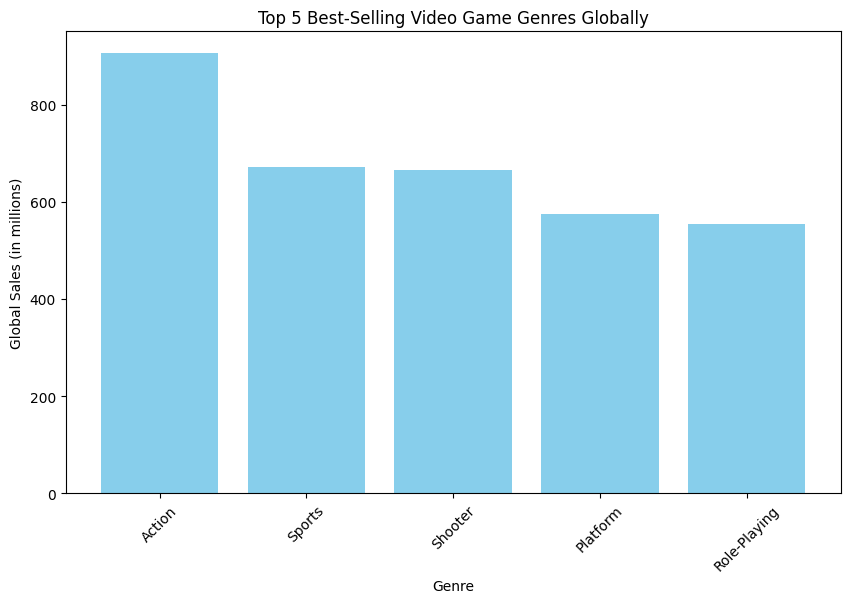

In [29]:
import matplotlib.pyplot as plt

# Convert your PySpark DataFrame to a Pandas DataFrame for plotting
genre_sales_sum_pd = genre_sales_sum.toPandas()

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(genre_sales_sum_pd['Genre'], genre_sales_sum_pd['Total_Global_Sales'], color='skyblue')
plt.title('Top 5 Best-Selling Video Game Genres Globally')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()


### LINECHART

In [30]:
import pyspark.pandas as ps


# Aggregate global sales by year
yearly_sales = df.groupBy('Year').agg(F.sum('Global_Sales').alias('Total_Global_Sales'))

# Convert to PySpark's pandas DataFrame for plotting
yearly_sales_pd = yearly_sales.to_pandas_on_spark()

# Sort the DataFrame by year
yearly_sales_pd = yearly_sales_pd.sort_values(by='Year')

# Plotting
yearly_sales_pd.plot.line(x='Year', y='Total_Global_Sales')


/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:5723: FutureWarning: DataFrame.to_pandas_on_spark is deprecated. Use DataFrame.pandas_api instead.
  warnings.warn(


### Area Chart of Yearly Sales

In [31]:
yearly_sales = df.groupBy('Year').agg(F.sum('Global_Sales').alias('Total_Sales')).orderBy('Year')


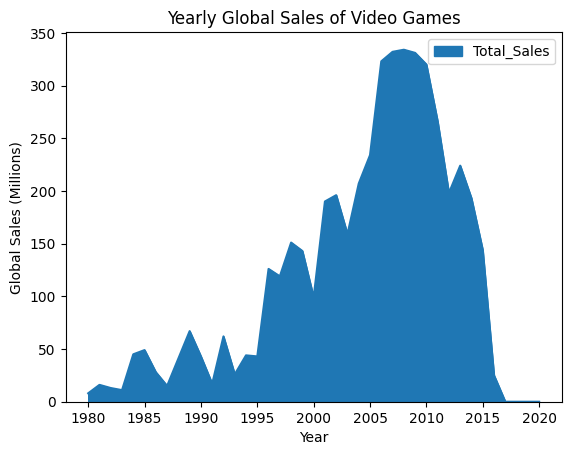

In [40]:
import matplotlib.pyplot as plt

yearly_sales_pd = yearly_sales.toPandas()

yearly_sales_pd.plot(kind='area', x='Year', y='Total_Sales')
plt.ylabel('Global Sales (Millions)')
plt.title('Yearly Global Sales of Video Games')
plt.show()


### Stacked Bar Chart for Regional Sales

In [37]:
top_games = df.orderBy(F.desc('Global_Sales')).limit(10)


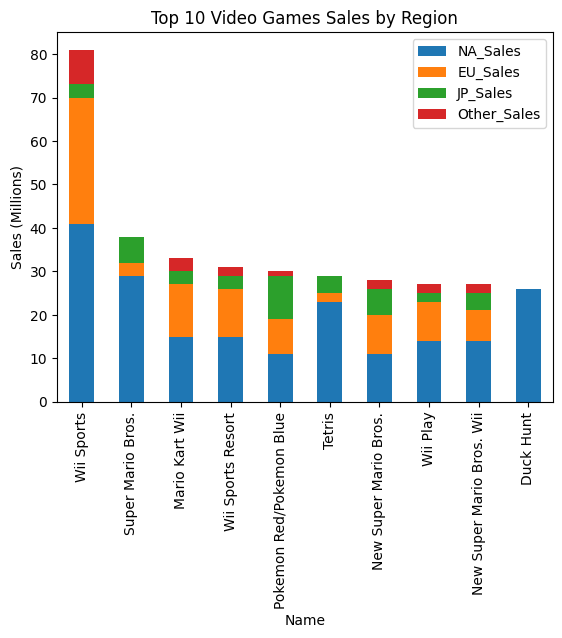

In [39]:
# Convert top_games to Pandas DataFrame named top_games_pd
top_games_pd = top_games.toPandas()

top_games_pd.plot(kind='bar', stacked=True, x='Name',
                  y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.ylabel('Sales (Millions)')
plt.title('Top 10 Video Games Sales by Region')
plt.show()


### Pie Chart for Market Share by Publisher

In [41]:
publisher_sales = df.groupBy('Publisher').agg(F.sum('Global_Sales').alias('Total_Sales')).orderBy(F.desc('Total_Sales')).limit(5)


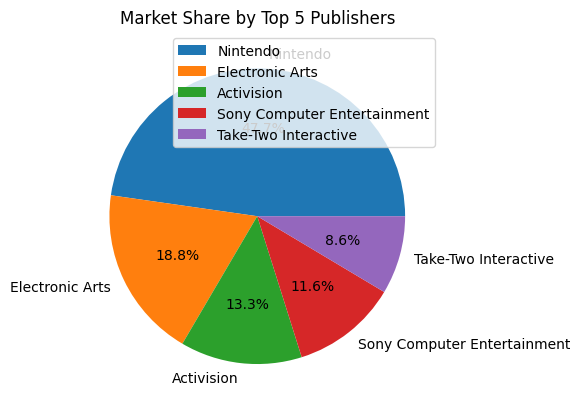

In [42]:
# Assuming publisher_sales_pd is the Pandas DataFrame
publisher_sales_pd = publisher_sales.toPandas()
publisher_sales_pd.plot(kind='pie', y='Total_Sales', labels=publisher_sales_pd['Publisher'], autopct='%1.1f%%')
plt.title('Market Share by Top 5 Publishers')
plt.ylabel('')  # Remove the default y-label as it's unnecessary for pie charts
plt.show()


## 12. BAR CHART

In [24]:
from pyspark.sql.functions import col

genre_counts = df.groupBy("Genre").count().orderBy(col("count").desc())
genre_counts.show()

+------------+-----+
|       Genre|count|
+------------+-----+
|      Action| 3316|
|      Sports| 2346|
|        Misc| 1739|
|Role-Playing| 1488|
|     Shooter| 1310|
|   Adventure| 1286|
|      Racing| 1249|
|    Platform|  886|
|  Simulation|  867|
|    Fighting|  848|
|    Strategy|  681|
|      Puzzle|  582|
+------------+-----+



In [27]:
from pyspark.sql import functions as F

# Group by 'Genre', then aggregate and sum 'Global_Sales', and order by the sum of 'Global_Sales' descending
genre_sales_agg = df.groupBy('Genre') \
                    .agg(F.sum('Global_Sales').alias('Total_Global_Sales')) \
                    .orderBy(F.desc('Total_Global_Sales'))

# Show the top genres by global sales
genre_sales_agg.show()


+------------+------------------+
|       Genre|Total_Global_Sales|
+------------+------------------+
|      Action|1751.1799999999691|
|      Sports| 1330.929999999988|
|     Shooter|1037.3699999999901|
|Role-Playing| 927.3699999999941|
|    Platform| 831.3699999999974|
|        Misc| 809.9599999999936|
|      Racing| 732.0399999999955|
|    Fighting|448.90999999999923|
|  Simulation|392.19999999999783|
|      Puzzle| 244.9500000000005|
|   Adventure|239.04000000000138|
|    Strategy| 175.1200000000004|
+------------+------------------+



In [31]:

# Collect the DataFrame to the driver node as a list of Rows
collected_data = genre_sales_agg.collect()

# Define a function to print a simple ASCII bar chart for collected PySpark data
def print_ascii_bar_chart_py(collected_data):
    # Find the maximum sales value for scaling
    max_sales = max([row['Total_Global_Sales'] for row in collected_data])
    scale = 50 / max_sales  # Scale factor to adjust bar lengths

    for row in collected_data:
        # Calculate the length of the bar
        bar_length = int(row['Total_Global_Sales'] * scale)
        bar = '*' * bar_length

        # Print the genre and its bar
        print(f"{row['Genre']}: {bar} ({row['Total_Global_Sales']}M)")

# Print the ASCII bar chart
print_ascii_bar_chart_py(collected_data)


Action: ************************************************** (1751.1799999999691M)
Sports: ************************************** (1330.929999999988M)
Shooter: ***************************** (1037.3699999999901M)
Role-Playing: ************************** (927.3699999999941M)
Platform: *********************** (831.3699999999974M)
Misc: *********************** (809.9599999999936M)
Racing: ******************** (732.0399999999955M)
Fighting: ************ (448.90999999999923M)
Simulation: *********** (392.19999999999783M)
Puzzle: ****** (244.9500000000005M)
Adventure: ****** (239.04000000000138M)
Strategy: ***** (175.1200000000004M)


In [32]:
from pyspark.sql import functions as F

# Group by 'Genre', then aggregate and sum 'Global_Sales', and order by the sum of 'Global_Sales' descending
Platform_sales_agg = df.groupBy('Platform') \
                    .agg(F.sum('Global_Sales').alias('Total_Global_Sales')) \
                    .orderBy(F.desc('Total_Global_Sales'))

# Show the top genres by global sales
Platform_sales_agg.show()

+--------+------------------+
|Platform|Total_Global_Sales|
+--------+------------------+
|     PS2|1255.6399999999871|
|    X360| 979.9599999999996|
|     PS3| 957.8399999999987|
|     Wii| 926.7099999999971|
|      DS| 822.4899999999874|
|      PS|  730.659999999997|
|     GBA|  318.499999999998|
|     PSP| 296.2799999999948|
|     PS4| 278.0999999999994|
|      PC|258.81999999999846|
|      XB|258.25999999999834|
|      GB|255.44999999999987|
|     NES|251.06999999999988|
|     3DS| 247.4600000000001|
|     N64|218.87999999999985|
|    SNES|200.05000000000024|
|      GC| 199.3600000000007|
|    XOne|141.05999999999995|
|    2600| 97.08000000000003|
|    WiiU| 81.86000000000006|
+--------+------------------+
only showing top 20 rows



In [35]:

# Collect the DataFrame to the driver node as a list of Rows
collected_data = Platform_sales_agg.collect()

# Define a function to print a simple ASCII bar chart for collected PySpark data
def print_ascii_bar_chart_py(collected_data):
    # Find the maximum sales value for scaling
    max_sales = max([row['Total_Global_Sales'] for row in collected_data])
    scale = 50 / max_sales  # Scale factor to adjust bar lengths

    for row in collected_data:
        # Calculate the length of the bar
        bar_length = int(row['Total_Global_Sales'] * scale)
        bar = '*' * bar_length

        # Print the genre and its bar
        print(f"{row['Platform']}: {bar} ({row['Total_Global_Sales']}M)")

# Print the ASCII bar chart
print_ascii_bar_chart_py(collected_data)

PS2: ************************************************** (1255.6399999999871M)
X360: *************************************** (979.9599999999996M)
PS3: ************************************** (957.8399999999987M)
Wii: ************************************ (926.7099999999971M)
DS: ******************************** (822.4899999999874M)
PS: ***************************** (730.659999999997M)
GBA: ************ (318.499999999998M)
PSP: *********** (296.2799999999948M)
PS4: *********** (278.0999999999994M)
PC: ********** (258.81999999999846M)
XB: ********** (258.25999999999834M)
GB: ********** (255.44999999999987M)
NES: ********* (251.06999999999988M)
3DS: ********* (247.4600000000001M)
N64: ******** (218.87999999999985M)
SNES: ******* (200.05000000000024M)
GC: ******* (199.3600000000007M)
XOne: ***** (141.05999999999995M)
2600: *** (97.08000000000003M)
WiiU: *** (81.86000000000006M)
PSV: ** (61.93000000000005M)
SAT: * (33.59000000000002M)
GEN: * (28.360000000000003M)
DC:  (15.969999999999997M)
SCD